### 📌RFM 분석
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 컬럼 분석

> Item Name: 상품의 이름 또는 설명  
> Category: 상품의 카테고리  
> Version: 상품의 버전  
> Item Code: 상품의 고유 코드   
> Item ID: 상품의 고유 id  
> Buyer ID: 상품을 구매한 고객의 고유 id  
> Transaction ID: 해당 주문 또는 거래의 id  
> Date: 해당 주문 또는 거래가 이루어진 날짜  
> Final Quantity: 최종 주문 수량  
> Total Revenue: 총 수익. 할인 또는 취소를 고려하지 않음.  
> Price Reductions: 할인 가격  
> Refunds: 환불/취소된 가격 총액  
> Final Revenue: 최종 수익. 할인 또는 취소된 가격을 포함하나 세금은 포함하지 않음.  
> Sales Tax: 거래에 적용된 세금  
> Overall Revenue: 전체 수익. 할인 또는 취소된 가격 및 세금까지 전부 포함함.  
> Refunded Item Count: 환불/취소된 수량  
> Purchased Item Count: 구매한 수량  

In [1]:
import pandas as pd
import numpy as np

# 데이터를 읽어옵니다.
o_df = pd.read_csv("./datasets/order_dataset.csv")
o_df

,Item Name,Category,Version,Item Code,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
0,QID,Product H,32 / B / 30,27-0CD-F44-7E1-0-2F608D7,46567054.0,3301861.0,5.363560e+13,14/04/2019,1,74.17,0.00,0.00,74.17,14.83,89.0,0,1
1,OTH,Product P,32 / B / FtO,37-9D1-AC6-D48-E-F2D4507,16345004.0,1205940.0,4.759180e+13,14/02/2019,-1,0.00,0.00,-79.17,-79.17,-15.83,-95.0,-1,0
2,WHX,Product P,32 / B / FtO,85-2EB-163-D62-5-FC50316,26246865.0,3342830.0,9.211720e+13,28/11/2018,-1,0.00,0.00,-74.17,-74.17,-14.83,-89.0,-1,0
3,RJF,Product P,33 / B / FtO,3D-687-99C-14F-4-661E2E7,42015157.0,7251983.0,5.987730e+13,3/3/2019,1,79.17,0.00,0.00,79.17,15.83,95.0,0,1
4,TSH,Product D,34 / B / FtO,F9-9FA-787-104-B-DCEE379,40522014.0,9940388.0,3.658240e+13,26/11/2018,1,74.17,0.00,0.00,74.17,14.83,89.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70047,RJF,Product P,36 / B / FtO,7C-D23-B98-39F-E-93ABC5C,56109013.0,3421398.0,1.498000e+13,20/11/2018,1,79.16,0.00,0.00,79.16,15.84,95.0,0,1
70048,KNB,Product P,33 / A / FtO,10-D34-C89-3B7-8-77333AA,35445869.0,1913362.0,1.506840e+13,3/4/2019,1,79.16,-7.91,0.00,71.25,14.25,85.5,0,1
70049,XEB,Product D,34 / A / FtO,EA-048-158-A25-3-11DAA3E,27215940.0,9781863.0,6.776480e+13,26/12/2018,1,51.67,0.00,0.00,51.67,10.33,62.0,0,1
70050,AYN,Product P,36 / B / FtO,89-517-B97-D81-B-F23CCC1,89883040.0,6808059.0,2.156440e+13,12/1/2019,1,55.00,0.00,0.00,55.00,11.00,66.0,0,1


In [2]:
# info()를 통해 데이터를 확인해봅니다.
o_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item Name             70052 non-null  object 
 1   Category              70052 non-null  object 
 2   Version               70052 non-null  object 
 3   Item Code             70052 non-null  object 
 4   Item ID               70052 non-null  float64
 5   Buyer ID              70052 non-null  float64
 6   Transaction ID        70052 non-null  float64
 7   Date                  70052 non-null  object 
 8   Final Quantity        70052 non-null  int64  
 9   Total Revenue         70052 non-null  float64
 10  Price Reductions      70052 non-null  float64
 11  Refunds               70052 non-null  float64
 12  Final Revenue         70052 non-null  float64
 13  Sales Tax             70052 non-null  float64
 14  Overall Revenue       70052 non-null  float64
 15  Refunded Item Count

### 1. 데이터 전처리

#### 1) 중복 데이터, 결측치, 이상치 검사 및 처리

In [3]:
# 중복 행 검사
o_df.duplicated().sum()

1

In [4]:
# 중복 행 1개를 제거합니다.
o_df.drop_duplicates(inplace=True)
o_df.duplicated().sum()

0

In [5]:
# 결측치 검사
o_df.isna().sum()

Item Name               0
Category                0
Version                 0
Item Code               0
Item ID                 0
Buyer ID                0
Transaction ID          0
Date                    0
Final Quantity          0
Total Revenue           0
Price Reductions        0
Refunds                 0
Final Revenue           0
Sales Tax               0
Overall Revenue         0
Refunded Item Count     0
Purchased Item Count    0
dtype: int64

In [6]:
# 이상치 (Outlier) 검사
# Category의 종류를 확인합니다.
o_df['Category'].value_counts()

Category
Product P    23351
Product H    15963
Product D     7079
Product B     3510
Product N     3348
Product W     2677
Product A     2461
Product C     2456
Product R     2106
Product J     1549
Product O     1158
Product F     1055
Product Q      638
Product G      548
Product I      499
Product M      449
Product U      383
DPR            266
Product T      228
Product E      201
Product L      115
Product K       10
Product S        1
Name: count, dtype: int64

In [7]:
# DPR 카테고리에 속하는 행들의 정보를 확인해봅니다.
o_df[o_df['Category'] == 'DPR']

,Item Name,Category,Version,Item Code,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
126,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657.0,6300796.0,5.073810e+13,13/03/2019,1,100.0,0.0,0.0,100.0,0.0,100.0,0,1
183,DPR,DPR,89,B4-CA5-576-2BB-C-22AC3F0,98970920.0,5174302.0,5.548170e+13,17/12/2018,1,89.0,0.0,0.0,89.0,0.0,89.0,0,1
532,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657.0,7658079.0,6.992830e+13,28/12/2018,1,100.0,0.0,0.0,100.0,0.0,100.0,0,1
550,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657.0,6627265.0,8.870820e+13,17/12/2018,1,100.0,0.0,0.0,100.0,0.0,100.0,0,1
1043,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657.0,3588067.0,5.458270e+13,11/12/2018,1,100.0,0.0,0.0,100.0,0.0,100.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69118,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657.0,1959399.0,9.631200e+13,25/04/2019,1,100.0,0.0,0.0,100.0,0.0,100.0,0,1
69146,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657.0,1490244.0,8.747800e+13,16/04/2019,1,100.0,0.0,0.0,100.0,0.0,100.0,0,1
69452,DPR,DPR,89,B4-CA5-576-2BB-C-22AC3F0,98970920.0,6703079.0,3.974460e+13,25/12/2018,1,89.0,0.0,0.0,89.0,0.0,89.0,0,1
69560,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657.0,8177445.0,5.136660e+13,6/12/2018,1,100.0,0.0,0.0,100.0,0.0,100.0,0,1


In [8]:
# DPR 관련 데이터는 정상 데이터로 판단 후 넘어갑니다.
# Date에 대한 이상치 검사를 진행하기 전 먼저 datetime type으로 변환합니다.
o_df['Date'] = pd.to_datetime(o_df['Date'], dayfirst=True)
o_df['Date'].dtype

dtype('<M8[ns]')

In [9]:
# Date에 대한 이상치를 검사합니다.
o_df['Date'].describe().T

count                            70051
mean     2019-01-25 21:53:45.769795840
min                2018-11-01 00:00:00
25%                2018-12-07 00:00:00
50%                2019-01-15 00:00:00
75%                2019-03-17 00:00:00
max                2019-04-30 00:00:00
Name: Date, dtype: object

In [10]:
# Final Quantity는 취소/환불의 경우 음수가 될 수 있으나, 0일 경우가 있을 수 있으므로 검사합니다.
(o_df['Final Quantity'] == 0).sum()

68

In [11]:
# 최종 주문 수량이 0인 경우 구매 또는 취소/환불 모두 아닌 경우이므로 RFM 산정 시 제외하기 위해 삭제합니다.
o_df = o_df[o_df['Final Quantity'] != 0]
o_df

,Item Name,Category,Version,Item Code,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
0,QID,Product H,32 / B / 30,27-0CD-F44-7E1-0-2F608D7,46567054.0,3301861.0,5.363560e+13,2019-04-14,1,74.17,0.00,0.00,74.17,14.83,89.0,0,1
1,OTH,Product P,32 / B / FtO,37-9D1-AC6-D48-E-F2D4507,16345004.0,1205940.0,4.759180e+13,2019-02-14,-1,0.00,0.00,-79.17,-79.17,-15.83,-95.0,-1,0
2,WHX,Product P,32 / B / FtO,85-2EB-163-D62-5-FC50316,26246865.0,3342830.0,9.211720e+13,2018-11-28,-1,0.00,0.00,-74.17,-74.17,-14.83,-89.0,-1,0
3,RJF,Product P,33 / B / FtO,3D-687-99C-14F-4-661E2E7,42015157.0,7251983.0,5.987730e+13,2019-03-03,1,79.17,0.00,0.00,79.17,15.83,95.0,0,1
4,TSH,Product D,34 / B / FtO,F9-9FA-787-104-B-DCEE379,40522014.0,9940388.0,3.658240e+13,2018-11-26,1,74.17,0.00,0.00,74.17,14.83,89.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70047,RJF,Product P,36 / B / FtO,7C-D23-B98-39F-E-93ABC5C,56109013.0,3421398.0,1.498000e+13,2018-11-20,1,79.16,0.00,0.00,79.16,15.84,95.0,0,1
70048,KNB,Product P,33 / A / FtO,10-D34-C89-3B7-8-77333AA,35445869.0,1913362.0,1.506840e+13,2019-04-03,1,79.16,-7.91,0.00,71.25,14.25,85.5,0,1
70049,XEB,Product D,34 / A / FtO,EA-048-158-A25-3-11DAA3E,27215940.0,9781863.0,6.776480e+13,2018-12-26,1,51.67,0.00,0.00,51.67,10.33,62.0,0,1
70050,AYN,Product P,36 / B / FtO,89-517-B97-D81-B-F23CCC1,89883040.0,6808059.0,2.156440e+13,2019-01-12,1,55.00,0.00,0.00,55.00,11.00,66.0,0,1


In [12]:
# Total Revenue의 분포를 확인해봅니다.
o_df[['Total Revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
Total Revenue,69983.0,61.767195,31.807147,0.0,51.67,74.17,79.17,445.0


In [13]:
# Total Revenue(총 수익)의 경우 구매에 관한 데이터의 경우 양수, 취소/환불의 경우 0을 값으로 가지며 음수가 존재하지 않으므로
# 이상치가 존재하지 않는다고 판단할 수 있습니다.
# Price Reductions의 분포를 확인해봅니다.
o_df[['Price Reductions']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price Reductions,69983.0,-4.944007,7.726386,-200.0,-8.34,0.0,0.0,0.0


In [14]:
# Price Reductions(할인 가격) 또한 할인된 주문의 경우 음수 값, 할인되지 않은 주문의 경우 0을 값으로 가지므로
# 이상치가 존재하지 않는다고 판단할 수 있습니다.
# Refunds의 분포를 확인해봅니다.
o_df[['Refunds']].describe().T

,count,mean,std,min,25%,50%,75%,max
Refunds,69983.0,-10.197748,25.106614,-237.5,0.0,0.0,0.0,0.0


In [15]:
# Final Quantity가 음수이지만 Refunds가 0인 행이 존재하는지 확인합니다.
((o_df['Final Quantity'] < 0) & (o_df['Refunds'] == 0)).sum()

5

In [16]:
# 해당 행을 삭제합니다.
o_df = o_df[~((o_df['Final Quantity'] < 0) & (o_df['Refunds'] == 0))]
o_df

,Item Name,Category,Version,Item Code,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
0,QID,Product H,32 / B / 30,27-0CD-F44-7E1-0-2F608D7,46567054.0,3301861.0,5.363560e+13,2019-04-14,1,74.17,0.00,0.00,74.17,14.83,89.0,0,1
1,OTH,Product P,32 / B / FtO,37-9D1-AC6-D48-E-F2D4507,16345004.0,1205940.0,4.759180e+13,2019-02-14,-1,0.00,0.00,-79.17,-79.17,-15.83,-95.0,-1,0
2,WHX,Product P,32 / B / FtO,85-2EB-163-D62-5-FC50316,26246865.0,3342830.0,9.211720e+13,2018-11-28,-1,0.00,0.00,-74.17,-74.17,-14.83,-89.0,-1,0
3,RJF,Product P,33 / B / FtO,3D-687-99C-14F-4-661E2E7,42015157.0,7251983.0,5.987730e+13,2019-03-03,1,79.17,0.00,0.00,79.17,15.83,95.0,0,1
4,TSH,Product D,34 / B / FtO,F9-9FA-787-104-B-DCEE379,40522014.0,9940388.0,3.658240e+13,2018-11-26,1,74.17,0.00,0.00,74.17,14.83,89.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70047,RJF,Product P,36 / B / FtO,7C-D23-B98-39F-E-93ABC5C,56109013.0,3421398.0,1.498000e+13,2018-11-20,1,79.16,0.00,0.00,79.16,15.84,95.0,0,1
70048,KNB,Product P,33 / A / FtO,10-D34-C89-3B7-8-77333AA,35445869.0,1913362.0,1.506840e+13,2019-04-03,1,79.16,-7.91,0.00,71.25,14.25,85.5,0,1
70049,XEB,Product D,34 / A / FtO,EA-048-158-A25-3-11DAA3E,27215940.0,9781863.0,6.776480e+13,2018-12-26,1,51.67,0.00,0.00,51.67,10.33,62.0,0,1
70050,AYN,Product P,36 / B / FtO,89-517-B97-D81-B-F23CCC1,89883040.0,6808059.0,2.156440e+13,2019-01-12,1,55.00,0.00,0.00,55.00,11.00,66.0,0,1


In [17]:
((o_df['Final Quantity'] < 0) & (o_df['Refunds'] == 0)).sum()

0

In [18]:
# Final Revenue의 분포를 확인해봅니다.
o_df[['Final Revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
Final Revenue,69978.0,46.628772,51.808192,-237.5,47.9125,63.33,74.17,445.0


In [19]:
# Final Revenue가 0인 행이 있는지 검사합니다.
(o_df['Final Revenue'] == 0).sum()

25

In [20]:
# Final Revenue가 0인 행을 불러와 정보를 확인해봅니다.
o_df[o_df['Final Revenue'] == 0]

,Item Name,Category,Version,Item Code,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
7228,YQX,Product H,36 / B / FtO,FE-CF2-1E3-B91-0-FC2F95D,13424927.0,9325878.0,5.834910e+13,2018-12-30,1,89.0,-89.0,0.0,0.0,0.0,0.0,0,1
9187,LQS,Product C,33 / A / FtO,C7-247-274-5DF-F-3B09882,26922227.0,4029832.0,3.186250e+13,2018-11-08,1,99.0,-99.0,0.0,0.0,0.0,0.0,0,1
13324,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868.0,4121004.0,2.926320e+13,2019-02-19,1,119.0,-119.0,0.0,0.0,0.0,0.0,0,1
14149,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868.0,4121004.0,5.361660e+13,2019-02-19,1,119.0,-119.0,0.0,0.0,0.0,0.0,0,1
15041,CLH,Product B,33 / A / FtO,E0-AFF-619-205-D-6AA15A5,24064862.0,2864696.0,3.186250e+13,2018-11-08,1,99.0,-99.0,0.0,0.0,0.0,0.0,0,1
16094,XEB,Product D,34 / C / FtO,E7-E9C-429-6E7-1-0D50EAC,27215940.0,6021898.0,6.653720e+13,2018-12-02,1,89.0,-89.0,0.0,0.0,0.0,0.0,0,1
20767,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686.0,3715657.0,1.474150e+13,2019-03-20,1,95.0,-95.0,0.0,0.0,0.0,0.0,0,1
23057,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686.0,3715657.0,3.625380e+13,2019-04-01,2,190.0,-190.0,0.0,0.0,0.0,0.0,0,2
25427,OTH,Product F,40 / B / FtO,53-5CA-7CF-8F5-9-28CB78B,43823868.0,4121004.0,5.361660e+13,2019-02-19,1,119.0,-119.0,0.0,0.0,0.0,0.0,0,1
27256,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657.0,1312378.0,6.184190e+13,2018-12-04,1,100.0,-100.0,0.0,0.0,0.0,0.0,0,1


In [21]:
# Final Revenue가 0인 경우는 주문 금액과 할인 가격이 동일하여 무료로 주문한 경우이므로 넘어갑니다.
# Sales Tax의 분포를 살펴봅니다.
o_df[['Sales Tax']].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales Tax,69978.0,9.133118,10.306463,-47.5,8.705,12.66,14.84,63.34


In [22]:
# Sales Tax(세금)이 음수인 경우를 확인해봅니다.
o_df[o_df['Sales Tax'] < 0]

,Item Name,Category,Version,Item Code,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
1,OTH,Product P,32 / B / FtO,37-9D1-AC6-D48-E-F2D4507,16345004.0,1205940.0,4.759180e+13,2019-02-14,-1,0.0,0.0,-79.17,-79.17,-15.83,-95.0,-1,0
2,WHX,Product P,32 / B / FtO,85-2EB-163-D62-5-FC50316,26246865.0,3342830.0,9.211720e+13,2018-11-28,-1,0.0,0.0,-74.17,-74.17,-14.83,-89.0,-1,0
8,WHX,Product A,34 / A / FtO,BB-624-2EC-849-6-55C3AE9,70509397.0,5467593.0,6.641700e+13,2019-03-20,-1,0.0,0.0,-107.50,-107.50,-21.50,-129.0,-1,0
17,RJF,Product P,35 / B / FtO,22-6A3-ACF-C57-6-3147EE4,88162726.0,5950642.0,1.344600e+13,2019-04-02,-1,0.0,0.0,-79.16,-79.16,-15.84,-95.0,-1,0
22,WHX,Product D,32 / A / 29,5A-02C-11D-258-0-EDB1CFD,29157946.0,4471680.0,4.726770e+13,2019-02-06,-1,0.0,0.0,-74.17,-74.17,-14.83,-89.0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70025,WHX,Product P,35 / A / FtO,B3-23B-1A3-62D-A-287B1D1,99622642.0,4159336.0,8.759020e+13,2018-12-19,-1,0.0,0.0,-63.33,-63.33,-12.67,-76.0,-1,0
70029,WHX,Product D,33 / A / FtO,59-D9E-0C2-348-C-DB04ABA,29996555.0,2960456.0,5.601260e+13,2019-02-26,-1,0.0,0.0,-66.75,-66.75,-13.35,-80.1,-1,0
70031,OTH,Product F,36 / B / FtO,86-B01-11F-5E1-4-1F7ACEB,61310715.0,7811258.0,9.987620e+13,2019-03-27,-1,0.0,0.0,-89.25,-89.25,-17.85,-107.1,-1,0
70035,YQX,Product H,34 / C / FtO,4E-704-D68-7D8-0-039056F,25390669.0,6798506.0,4.186760e+13,2019-03-29,-1,0.0,0.0,-74.17,-74.17,-14.83,-89.0,-1,0


In [23]:
# 세금이 음수인 경우는 취소/환불 주문 데이터에 해당하므로 넘어갑니다.
# Overall Revenue(전체 수익, 할인/세금 포함)의 분포를 살펴봅니다.
o_df[['Overall Revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overall Revenue,69978.0,55.761888,61.927108,-285.0,56.5,76.0,89.0,445.0


In [24]:
# Refunded Item Count 및 Purchased Item Count 의 이상치를 검사하기 위해 두 컬럼의 합과 Final Quantity가 일치하지 않는 행이 있는지 확인합니다.
(o_df['Refunded Item Count'] + o_df['Purchased Item Count'] != o_df['Final Quantity']).sum()

0

#### 2) 불필요한 컬럼 삭제 및 데이터 정제
- Category의 경우 'DPR' 값을 제외하면 Product 부분이 공통되므로 구분을 위한 알파벳만 남기고 삭제합니다.
- Version은 필요하지 않으므로 삭제합니다.
- 상품의 고유 id(Item ID)가 존재하므로 Item Code는 삭제합니다.
- R(Recency) 계산 시 필요한 Date는 앞서 datetime 타입으로 변경하였으므로 넘어갑니다.
- F(Frequency) 계산 시에는 구매 수량(Purchased Item Count)을 기준으로 계산합니다.
- M(Monetary) 계산 시 세금(Sales Tax) 및 할인 금액(Price Reductions)까지 포함한 총액인 Overall Revenue를 기준으로 계산할 예정이므로 Total Revenue, Price Reductions, Final Revenue, Sales Tax 컬럼을 삭제합니다.

In [25]:
o_df

,Item Name,Category,Version,Item Code,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
0,QID,Product H,32 / B / 30,27-0CD-F44-7E1-0-2F608D7,46567054.0,3301861.0,5.363560e+13,2019-04-14,1,74.17,0.00,0.00,74.17,14.83,89.0,0,1
1,OTH,Product P,32 / B / FtO,37-9D1-AC6-D48-E-F2D4507,16345004.0,1205940.0,4.759180e+13,2019-02-14,-1,0.00,0.00,-79.17,-79.17,-15.83,-95.0,-1,0
2,WHX,Product P,32 / B / FtO,85-2EB-163-D62-5-FC50316,26246865.0,3342830.0,9.211720e+13,2018-11-28,-1,0.00,0.00,-74.17,-74.17,-14.83,-89.0,-1,0
3,RJF,Product P,33 / B / FtO,3D-687-99C-14F-4-661E2E7,42015157.0,7251983.0,5.987730e+13,2019-03-03,1,79.17,0.00,0.00,79.17,15.83,95.0,0,1
4,TSH,Product D,34 / B / FtO,F9-9FA-787-104-B-DCEE379,40522014.0,9940388.0,3.658240e+13,2018-11-26,1,74.17,0.00,0.00,74.17,14.83,89.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70047,RJF,Product P,36 / B / FtO,7C-D23-B98-39F-E-93ABC5C,56109013.0,3421398.0,1.498000e+13,2018-11-20,1,79.16,0.00,0.00,79.16,15.84,95.0,0,1
70048,KNB,Product P,33 / A / FtO,10-D34-C89-3B7-8-77333AA,35445869.0,1913362.0,1.506840e+13,2019-04-03,1,79.16,-7.91,0.00,71.25,14.25,85.5,0,1
70049,XEB,Product D,34 / A / FtO,EA-048-158-A25-3-11DAA3E,27215940.0,9781863.0,6.776480e+13,2018-12-26,1,51.67,0.00,0.00,51.67,10.33,62.0,0,1
70050,AYN,Product P,36 / B / FtO,89-517-B97-D81-B-F23CCC1,89883040.0,6808059.0,2.156440e+13,2019-01-12,1,55.00,0.00,0.00,55.00,11.00,66.0,0,1


In [26]:
# Category 컬럼의 값 변경
def get_alphabet(category):
    category = category.split()[-1]
    return category

o_df.loc[:, 'Category'] = o_df['Category'].apply(get_alphabet)
display(o_df['Category'].value_counts())

Category
P      23335
H      15948
D       7072
B       3508
N       3329
W       2675
A       2461
C       2455
R       2105
J       1547
O       1158
F       1051
Q        637
G        547
I        499
M        449
U        383
DPR      265
T        227
E        201
L        115
K         10
S          1
Name: count, dtype: int64

In [27]:
# Version, Item Code, Total Revenue, Price Reductions, Final Revenue, Sales Tax 컬럼 삭제
o_df.drop(columns=['Version', 'Item Code', 'Total Revenue', 'Price Reductions', 'Final Revenue', 'Sales Tax'], inplace=True)
o_df

C:\Users\hyuns\AppData\Local\Temp\ipykernel_26628\86904081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_df.drop(columns=['Version', 'Item Code', 'Total Revenue', 'Price Reductions', 'Final Revenue', 'Sales Tax'], inplace=True)


,Item Name,Category,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Refunds,Overall Revenue,Refunded Item Count,Purchased Item Count
0,QID,H,46567054.0,3301861.0,5.363560e+13,2019-04-14,1,0.00,89.0,0,1
1,OTH,P,16345004.0,1205940.0,4.759180e+13,2019-02-14,-1,-79.17,-95.0,-1,0
2,WHX,P,26246865.0,3342830.0,9.211720e+13,2018-11-28,-1,-74.17,-89.0,-1,0
3,RJF,P,42015157.0,7251983.0,5.987730e+13,2019-03-03,1,0.00,95.0,0,1
4,TSH,D,40522014.0,9940388.0,3.658240e+13,2018-11-26,1,0.00,89.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
70047,RJF,P,56109013.0,3421398.0,1.498000e+13,2018-11-20,1,0.00,95.0,0,1
70048,KNB,P,35445869.0,1913362.0,1.506840e+13,2019-04-03,1,0.00,85.5,0,1
70049,XEB,D,27215940.0,9781863.0,6.776480e+13,2018-12-26,1,0.00,62.0,0,1
70050,AYN,P,89883040.0,6808059.0,2.156440e+13,2019-01-12,1,0.00,66.0,0,1


### 2. RFM 점수 산정
- 구매한 기록이 있는 고객만을 대상으로 RFM 점수를 산정합니다.
- 고객의 id(Buyer ID)를 기준으로 취소/환불이 아닌 구매 데이터의 가장 최근 날짜를 가져와 R(Recency)을 계산합니다.
- 고객의 id(Buyer ID)를 기준으로 취소/환불이 아닌 구매 수량의 총합을 구하여 F(Frequency)를 계산합니다.
- 고객의 id(Buyer ID)를 기준으로 취소/환불 금액을 포함한 결제 총액을 구하여 M(Monetary)을 계산합니다.


In [28]:
non_refund_df = o_df[o_df['Purchased Item Count'] > 0]
non_refund_df

,Item Name,Category,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Refunds,Overall Revenue,Refunded Item Count,Purchased Item Count
0,QID,H,46567054.0,3301861.0,5.363560e+13,2019-04-14,1,0.0,89.0,0,1
3,RJF,P,42015157.0,7251983.0,5.987730e+13,2019-03-03,1,0.0,95.0,0,1
4,TSH,D,40522014.0,9940388.0,3.658240e+13,2018-11-26,1,0.0,89.0,0,1
5,BKT,Q,32047144.0,9139641.0,2.956120e+13,2019-01-02,1,0.0,44.0,0,1
6,TSH,P,40522014.0,3621461.0,1.192810e+13,2018-12-26,1,0.0,66.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
70047,RJF,P,56109013.0,3421398.0,1.498000e+13,2018-11-20,1,0.0,95.0,0,1
70048,KNB,P,35445869.0,1913362.0,1.506840e+13,2019-04-03,1,0.0,85.5,0,1
70049,XEB,D,27215940.0,9781863.0,6.776480e+13,2018-12-26,1,0.0,62.0,0,1
70050,AYN,P,89883040.0,6808059.0,2.156440e+13,2019-01-12,1,0.0,66.0,0,1


In [29]:
recent_date_df = non_refund_df.groupby('Buyer ID')['Date'].max().reset_index()
recent_date_df

,Buyer ID,Date
0,1.000661e+06,2018-11-23
1,1.001914e+06,2018-11-23
2,1.002167e+06,2019-03-08
3,1.002387e+06,2019-03-17
4,1.002419e+06,2019-01-06
...,...,...
24856,9.780500e+13,2019-03-22
24857,9.885470e+13,2019-03-29
24858,9.897420e+13,2019-04-01
24859,9.926270e+13,2018-11-04


In [30]:
# 가장 최근 날짜를 기준으로 날짜의 차이를 구하여 Recency 컬럼에 저장합니다.
most_recent_date = recent_date_df['Date'].max()
recent_date_df.loc[:, 'Recency'] = recent_date_df['Date'].apply(lambda x: (pd.to_datetime(most_recent_date) - pd.to_datetime(x)).days)
recent_date_df

,Buyer ID,Date,Recency
0,1.000661e+06,2018-11-23,158
1,1.001914e+06,2018-11-23,158
2,1.002167e+06,2019-03-08,53
3,1.002387e+06,2019-03-17,44
4,1.002419e+06,2019-01-06,114
...,...,...,...
24856,9.780500e+13,2019-03-22,39
24857,9.885470e+13,2019-03-29,32
24858,9.897420e+13,2019-04-01,29
24859,9.926270e+13,2018-11-04,177


In [31]:
# Date 컬럼을 삭제합니다.
recent_date_df.drop(columns=['Date'], inplace=True)
recent_date_df

,Buyer ID,Recency
0,1.000661e+06,158
1,1.001914e+06,158
2,1.002167e+06,53
3,1.002387e+06,44
4,1.002419e+06,114
...,...,...
24856,9.780500e+13,39
24857,9.885470e+13,32
24858,9.897420e+13,29
24859,9.926270e+13,177


In [32]:
# 구매 수량의 총합을 바탕으로 F(Frequency)를 구하여 저장
frequency_df = non_refund_df.groupby('Buyer ID')['Purchased Item Count'].sum().reset_index()
frequency_df

,Buyer ID,Purchased Item Count
0,1.000661e+06,3
1,1.001914e+06,1
2,1.002167e+06,3
3,1.002387e+06,1
4,1.002419e+06,2
...,...,...
24856,9.780500e+13,5
24857,9.885470e+13,3
24858,9.897420e+13,1
24859,9.926270e+13,3


In [33]:
frequency_df = frequency_df.rename(columns={'Purchased Item Count': 'Frequency'})
frequency_df

,Buyer ID,Frequency
0,1.000661e+06,3
1,1.001914e+06,1
2,1.002167e+06,3
3,1.002387e+06,1
4,1.002419e+06,2
...,...,...
24856,9.780500e+13,5
24857,9.885470e+13,3
24858,9.897420e+13,1
24859,9.926270e+13,3


In [39]:
# 취소/환불 금액을 포함한 결제 총액을 구하여 M(Monetary)을 구하고 저장
monetary_df = non_refund_df.groupby('Buyer ID')['Overall Revenue'].sum().reset_index()
monetary_df

,Buyer ID,Overall Revenue
0,1.000661e+06,260.0
1,1.001914e+06,79.2
2,1.002167e+06,234.2
3,1.002387e+06,89.0
4,1.002419e+06,103.0
...,...,...
24856,9.780500e+13,259.0
24857,9.885470e+13,242.5
24858,9.897420e+13,89.0
24859,9.926270e+13,267.0


In [43]:
monetary_df = monetary_df.rename(columns={'Overall Revenue': 'Monetary'})
monetary_df

,Buyer ID,Monetary
0,1.000661e+06,260.0
1,1.001914e+06,79.2
2,1.002167e+06,234.2
3,1.002387e+06,89.0
4,1.002419e+06,103.0
...,...,...
24856,9.780500e+13,259.0
24857,9.885470e+13,242.5
24858,9.897420e+13,89.0
24859,9.926270e+13,267.0


In [44]:
# Recency, Frequency, Monetary에 대한 각각의 데이터프레임을 하나로 merge합니다.
rfm_df = recent_date_df.merge(frequency_df, on='Buyer ID')
rfm_df

,Buyer ID,Recency,Frequency
0,1.000661e+06,158,3
1,1.001914e+06,158,1
2,1.002167e+06,53,3
3,1.002387e+06,44,1
4,1.002419e+06,114,2
...,...,...,...
24856,9.780500e+13,39,5
24857,9.885470e+13,32,3
24858,9.897420e+13,29,1
24859,9.926270e+13,177,3


In [45]:
rfm_df = rfm_df.merge(monetary_df, on='Buyer ID')
rfm_df

,Buyer ID,Recency,Frequency,Monetary
0,1.000661e+06,158,3,260.0
1,1.001914e+06,158,1,79.2
2,1.002167e+06,53,3,234.2
3,1.002387e+06,44,1,89.0
4,1.002419e+06,114,2,103.0
...,...,...,...,...
24856,9.780500e+13,39,5,259.0
24857,9.885470e+13,32,3,242.5
24858,9.897420e+13,29,1,89.0
24859,9.926270e+13,177,3,267.0


In [46]:
# sklearn의 MinMaxScaler를 활용하여 0~1사이의 값으로 각 수치를 정규화합니다.
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

In [47]:
rfm_df[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency', 'Frequency', 'Monetary'])
rfm_df

,Buyer ID,Recency,Frequency,Monetary
0,1.000661e+06,0.877778,0.052632,0.083022
1,1.001914e+06,0.877778,0.000000,0.025290
2,1.002167e+06,0.294444,0.052632,0.074784
3,1.002387e+06,0.244444,0.000000,0.028419
4,1.002419e+06,0.633333,0.026316,0.032889
...,...,...,...,...
24856,9.780500e+13,0.216667,0.105263,0.082703
24857,9.885470e+13,0.177778,0.052632,0.077434
24858,9.897420e+13,0.161111,0.000000,0.028419
24859,9.926270e+13,0.983333,0.052632,0.085257


In [50]:
# 제일 최근 날짜일 수록 더 큰 Recency 값을 가져야 하므로 Recency 컬럼의 값을 각각 1에서 뺀 값으로 대체합니다.
rfm_df['Recency'] = 1 - rfm_df['Recency']
rfm_df

,Buyer ID,Recency,Frequency,Monetary
0,1.000661e+06,0.122222,0.052632,0.083022
1,1.001914e+06,0.122222,0.000000,0.025290
2,1.002167e+06,0.705556,0.052632,0.074784
3,1.002387e+06,0.755556,0.000000,0.028419
4,1.002419e+06,0.366667,0.026316,0.032889
...,...,...,...,...
24856,9.780500e+13,0.783333,0.105263,0.082703
24857,9.885470e+13,0.822222,0.052632,0.077434
24858,9.897420e+13,0.838889,0.000000,0.028419
24859,9.926270e+13,0.016667,0.052632,0.085257


In [51]:
# Recency, Frequency, Monetary 수치를 더한 TotalScore 값을 구하여 컬럼을 만들고 저장합니다.
rfm_df.loc[:, 'TotalScore'] = rfm_df['Recency'] + rfm_df['Frequency'] + rfm_df['Monetary']
rfm_df

,Buyer ID,Recency,Frequency,Monetary,TotalScore
0,1.000661e+06,0.122222,0.052632,0.083022,0.257876
1,1.001914e+06,0.122222,0.000000,0.025290,0.147512
2,1.002167e+06,0.705556,0.052632,0.074784,0.832971
3,1.002387e+06,0.755556,0.000000,0.028419,0.783975
4,1.002419e+06,0.366667,0.026316,0.032889,0.425872
...,...,...,...,...,...
24856,9.780500e+13,0.783333,0.105263,0.082703,0.971299
24857,9.885470e+13,0.822222,0.052632,0.077434,0.952288
24858,9.897420e+13,0.838889,0.000000,0.028419,0.867308
24859,9.926270e+13,0.016667,0.052632,0.085257,0.154555


In [53]:
# 원본 데이터프레임과 Buyer ID를 기준으로 merge하여 TotalScore 컬럼 및 값을 추가합니다.
o_df = o_df.merge(rfm_df[['Buyer ID', 'TotalScore']], on='Buyer ID')
o_df

,Item Name,Category,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Refunds,Overall Revenue,Refunded Item Count,Purchased Item Count,TotalScore
0,QID,H,46567054.0,3301861.0,5.363560e+13,2019-04-14,1,0.0,89.0,0,1,1.229478
1,MAG,B,24064862.0,3301861.0,6.016930e+13,2018-11-23,1,0.0,79.2,0,1,1.229478
2,OTH,D,61310715.0,3301861.0,6.025800e+13,2019-04-27,1,0.0,89.0,0,1,1.229478
3,INU,D,19814633.0,3301861.0,7.841720e+13,2019-02-10,1,0.0,89.0,0,1,1.229478
4,VXH,P,40522014.0,3301861.0,1.013270e+13,2018-12-09,1,0.0,95.0,0,1,1.229478
...,...,...,...,...,...,...,...,...,...,...,...,...
69040,EYV,H,63979323.0,9665063.0,6.612840e+13,2019-01-13,1,0.0,62.0,0,1,0.425353
69041,WHX,P,78029228.0,7942710.0,8.840060e+13,2019-04-02,1,0.0,95.0,0,1,0.874779
69042,WHX,P,66995443.0,9573019.0,5.620920e+13,2019-03-05,1,0.0,95.0,0,1,0.719224
69043,KNB,P,35445869.0,1913362.0,1.506840e+13,2019-04-03,1,0.0,85.5,0,1,0.877301


### 3. RFM 점수에 따라 고객 등급 분류하기
- RFM 점수에 따라 Bronze, Silver, Gold, Diamond, VIP의 총 5개 등급으로 고객을 그룹화합니다.

In [54]:
import numpy as np

l1, l2, l3, l4 = np.percentile(o_df['TotalScore'], [20, 45, 70, 90])
print(l1, l2, l3, l4)

0.38321619500422666 0.7369677362611752 1.0184011430370479 1.2774485468068741


In [55]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [56]:
o_df['Level'] = o_df['TotalScore'].apply(get_level)
o_df

,Item Name,Category,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Refunds,Overall Revenue,Refunded Item Count,Purchased Item Count,TotalScore,Level
0,QID,H,46567054.0,3301861.0,5.363560e+13,2019-04-14,1,0.0,89.0,0,1,1.229478,2
1,MAG,B,24064862.0,3301861.0,6.016930e+13,2018-11-23,1,0.0,79.2,0,1,1.229478,2
2,OTH,D,61310715.0,3301861.0,6.025800e+13,2019-04-27,1,0.0,89.0,0,1,1.229478,2
3,INU,D,19814633.0,3301861.0,7.841720e+13,2019-02-10,1,0.0,89.0,0,1,1.229478,2
4,VXH,P,40522014.0,3301861.0,1.013270e+13,2018-12-09,1,0.0,95.0,0,1,1.229478,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69040,EYV,H,63979323.0,9665063.0,6.612840e+13,2019-01-13,1,0.0,62.0,0,1,0.425353,4
69041,WHX,P,78029228.0,7942710.0,8.840060e+13,2019-04-02,1,0.0,95.0,0,1,0.874779,3
69042,WHX,P,66995443.0,9573019.0,5.620920e+13,2019-03-05,1,0.0,95.0,0,1,0.719224,4
69043,KNB,P,35445869.0,1913362.0,1.506840e+13,2019-04-03,1,0.0,85.5,0,1,0.877301,3


In [57]:
order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

o_df['Level'] = o_df['Level'].replace([5, 4, 3, 2, 1], order)
o_df

,Item Name,Category,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Refunds,Overall Revenue,Refunded Item Count,Purchased Item Count,TotalScore,Level
0,QID,H,46567054.0,3301861.0,5.363560e+13,2019-04-14,1,0.0,89.0,0,1,1.229478,Diamond
1,MAG,B,24064862.0,3301861.0,6.016930e+13,2018-11-23,1,0.0,79.2,0,1,1.229478,Diamond
2,OTH,D,61310715.0,3301861.0,6.025800e+13,2019-04-27,1,0.0,89.0,0,1,1.229478,Diamond
3,INU,D,19814633.0,3301861.0,7.841720e+13,2019-02-10,1,0.0,89.0,0,1,1.229478,Diamond
4,VXH,P,40522014.0,3301861.0,1.013270e+13,2018-12-09,1,0.0,95.0,0,1,1.229478,Diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69040,EYV,H,63979323.0,9665063.0,6.612840e+13,2019-01-13,1,0.0,62.0,0,1,0.425353,Silver
69041,WHX,P,78029228.0,7942710.0,8.840060e+13,2019-04-02,1,0.0,95.0,0,1,0.874779,Gold
69042,WHX,P,66995443.0,9573019.0,5.620920e+13,2019-03-05,1,0.0,95.0,0,1,0.719224,Silver
69043,KNB,P,35445869.0,1913362.0,1.506840e+13,2019-04-03,1,0.0,85.5,0,1,0.877301,Gold


In [58]:
print(o_df['Level'].value_counts())

Level
Gold       17261
Silver     17260
Diamond    13812
Bronze     13810
VIP         6902
Name: count, dtype: int64


### 4. 데이터 시각화 및 분석

#### 📌1. 등급별 고객 수 시각화하기

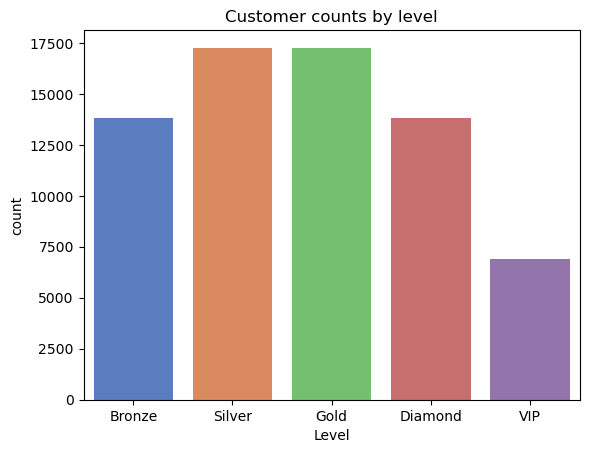

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
sns.countplot(x='Level', data=o_df, palette='muted', order=order)
plt.title('Customer counts by level')
plt.show()

#### 🖥️시각화 결과

<sub>Silver와 Gold 등급의 고객 수가 가장 많고, Bronze와 Diamond 등급의 고객 수는 그 다음으로 많았으며 VIP 등급의 고객 수는 상대적으로 적게 나타났다.</sub>

#### 📌2. 등급별 구매 빈도 및 매출액 시각화하기

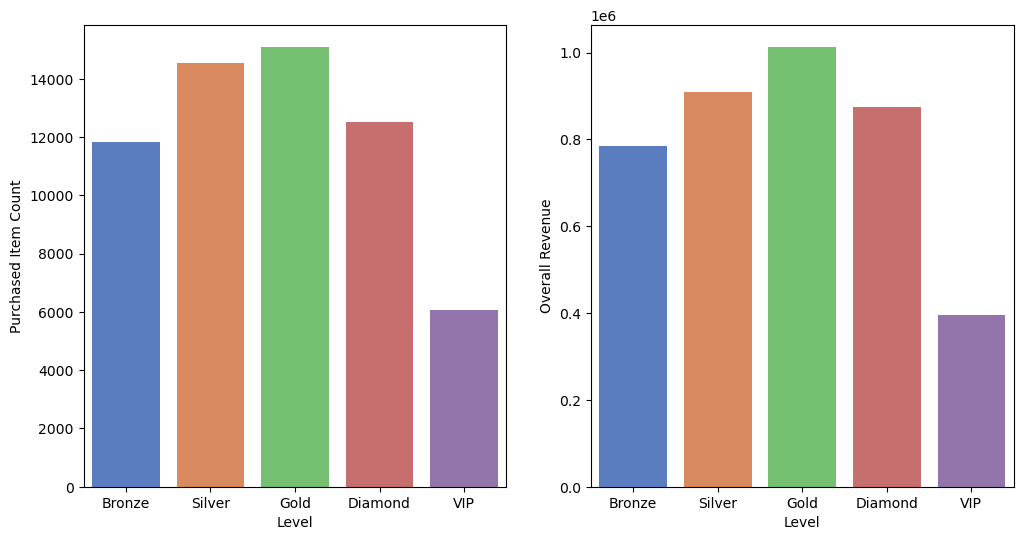

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

level_purchase_cnt_df = o_df.groupby('Level')[['Purchased Item Count']].sum().reset_index()

level_order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
sns.barplot(ax=axes[0], x='Level', y='Purchased Item Count', data=level_purchase_cnt_df, palette='muted', order=level_order)

level_revenue_df = o_df.groupby('Level')[['Overall Revenue']].sum().reset_index()
sns.barplot(ax=axes[1], x='Level', y='Overall Revenue', data=level_revenue_df, palette='muted', order=level_order)

plt.show()

#### 🖥️시각화 결과
<sub>고객 등급별 구매 빈도와 매출액을 시각화해본 결과, 두 그래프 모두 비슷한 양상을 보였다.  
    따라서 구매 빈도가 높은 고객일 수록 매출액에 기여하는 비중이 크며, 이는 모든 고객 등급에 해당하는 사실로 볼 수 있다.
</sub>

#### 📌3. 등급별 카테고리에 따른 구매 빈도 및 매출액 시각화하기

- 등급별 분포를 살펴보기 전에, 카테고리에 따른 구매 빈도 및 매출액을 시각화하여 높은 순으로 상위 4개의 카테고리를 추출하고자 한다.

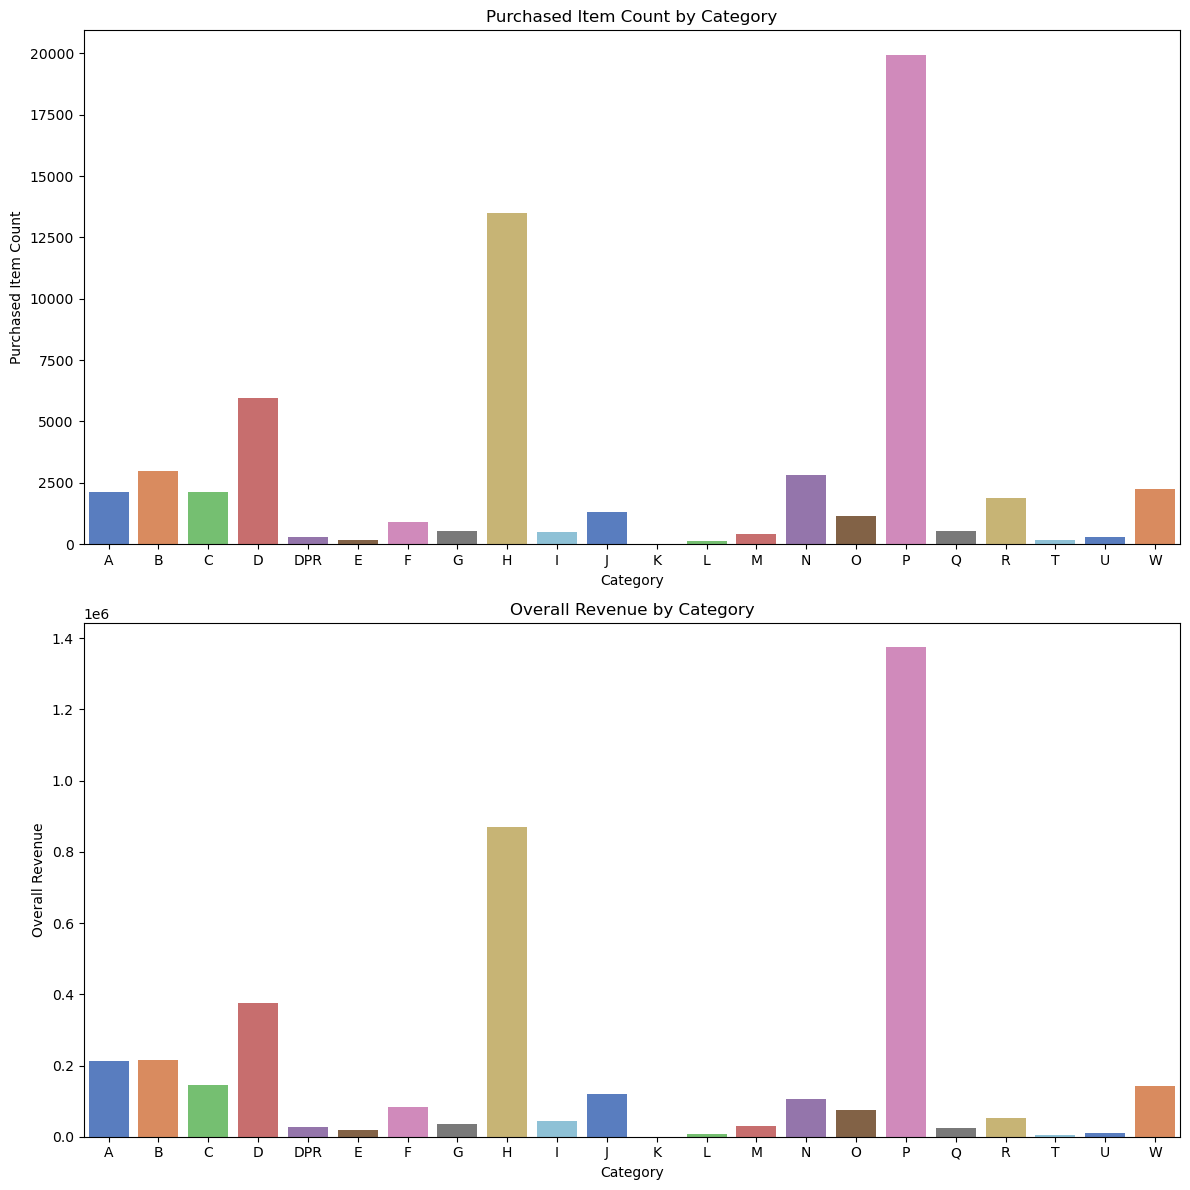

In [102]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
axes = axes.flatten()

category_purchase_df = o_df.groupby('Category')[['Purchased Item Count']].sum().reset_index()
category_revenue_df = o_df.groupby('Category')[['Overall Revenue']].sum().reset_index()

sns.barplot(ax=axes[0], x='Category', y='Purchased Item Count', data=category_purchase_df, palette='muted')
axes[0].set_title('Purchased Item Count by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Purchased Item Count')

sns.barplot(ax=axes[1], x='Category', y='Overall Revenue', data=category_revenue_df, palette='muted')
axes[1].set_title('Overall Revenue by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Overall Revenue')

plt.tight_layout()
plt.show()

#### 🖥️시각화 결과

- 앞서 구매 빈도와 매출액의 고객 등급별 분포가 유사한 양상을 보였던 것처럼, 카테고리에 따른 구매 빈도와 매출액 또한 유사한 양상을 보였다.
- 따라서 매출액의 비중에 주목하여, 특히 매출액 기준 상위 4개 카테고리인 P, H, D, B를 파이 그래프로 나타냄으로써 등급별 비중을 자세히 분석하고자 한다.
  

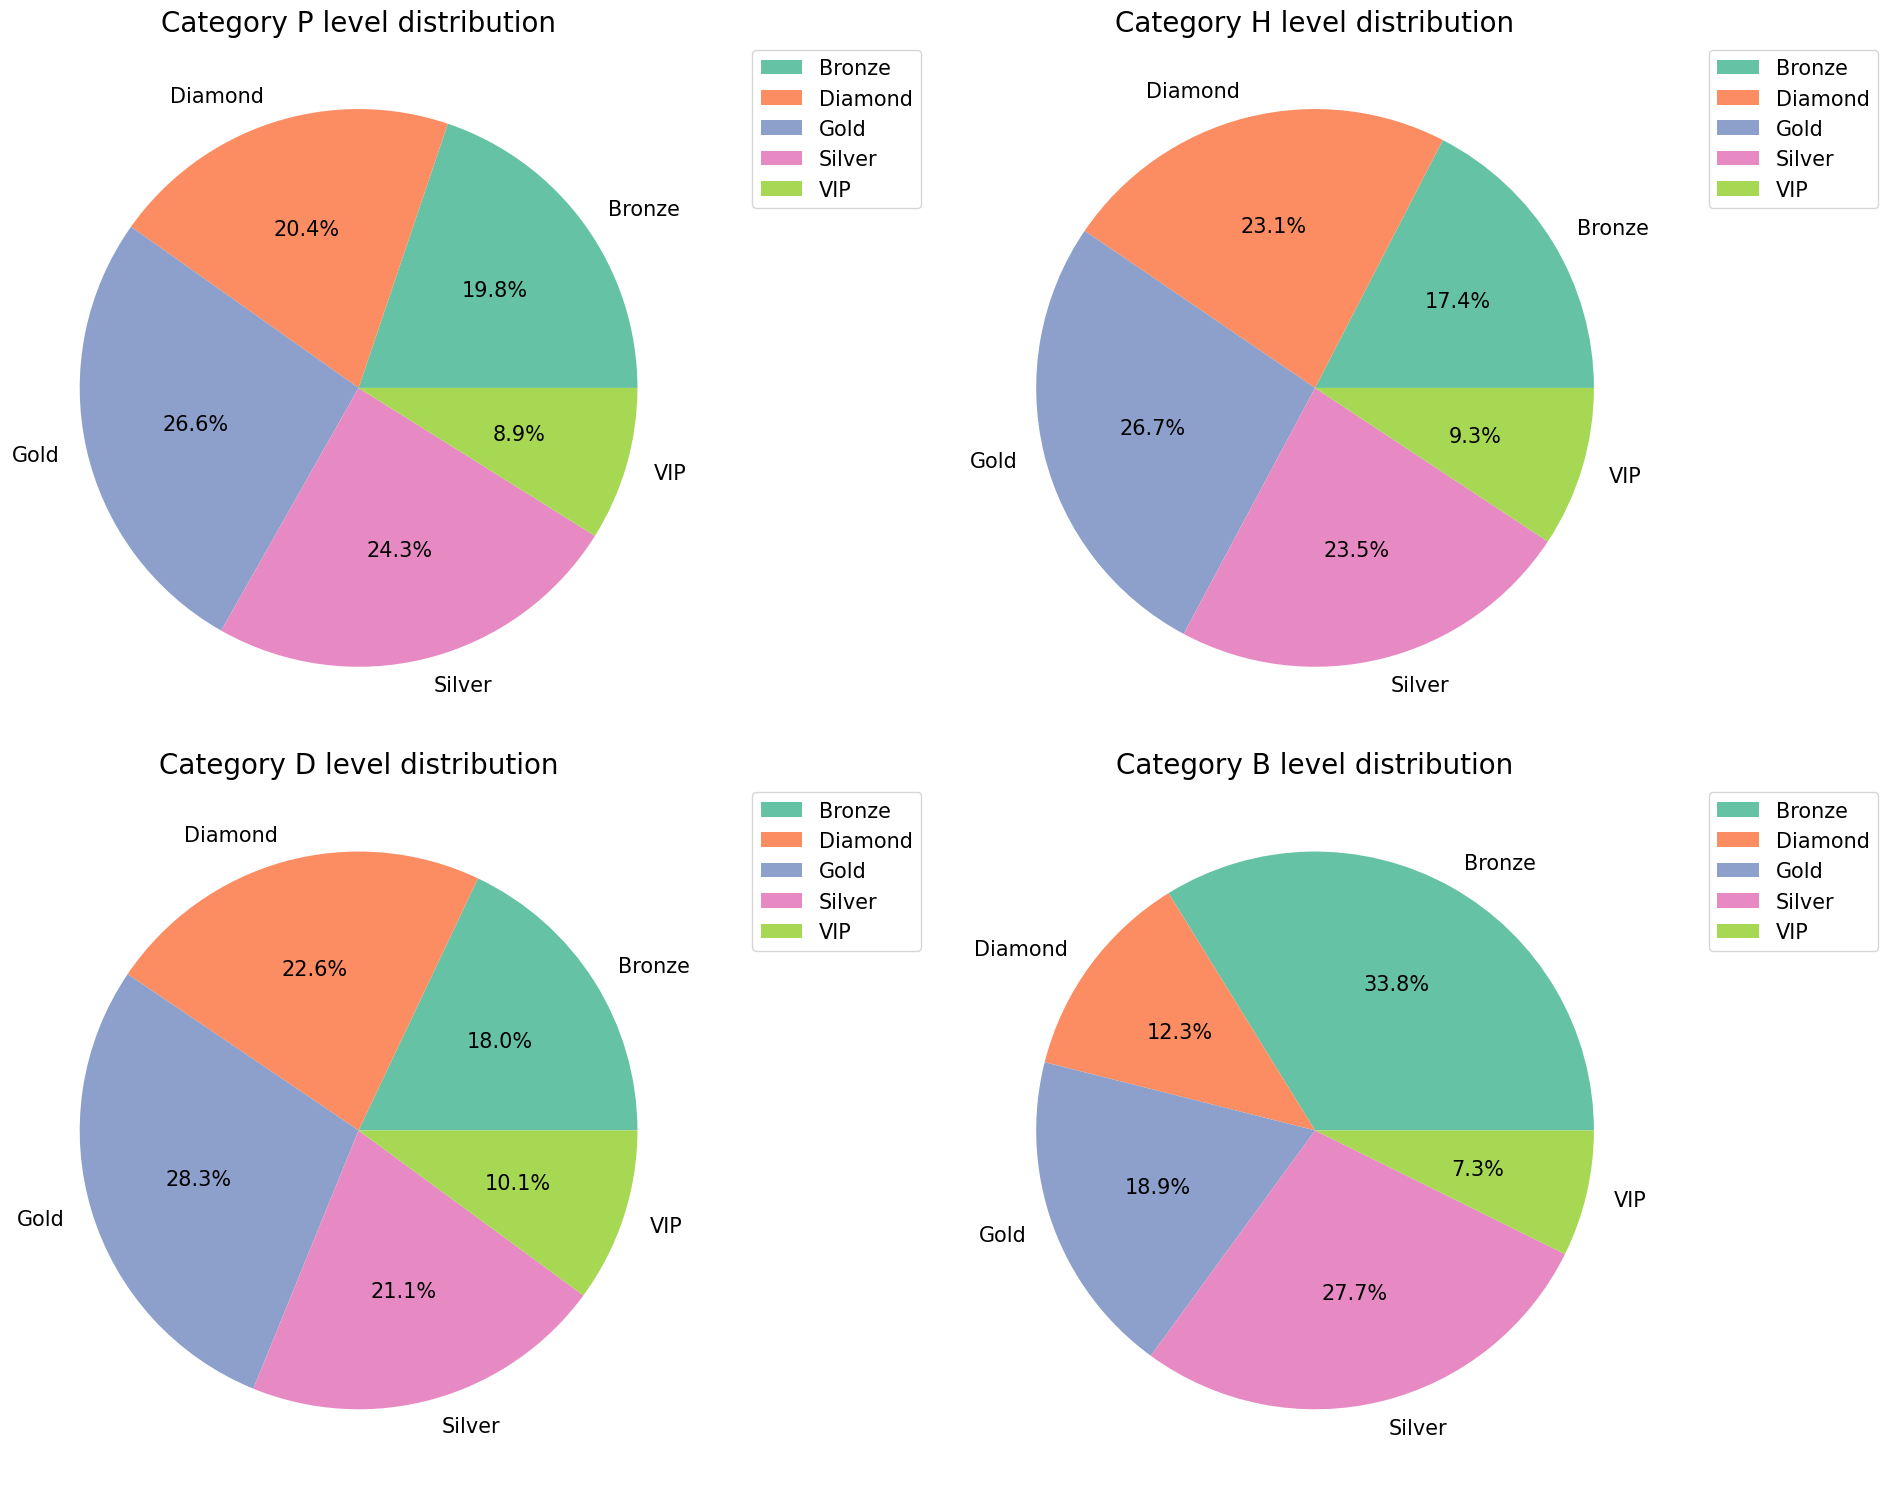

In [103]:
P_df = o_df[o_df['Category'] == 'P'].groupby('Level')[['Overall Revenue']].sum()
H_df = o_df[o_df['Category'] == 'H'].groupby('Level')[['Overall Revenue']].sum()
D_df = o_df[o_df['Category'] == 'D'].groupby('Level')[['Overall Revenue']].sum()
B_df = o_df[o_df['Category'] == 'B'].groupby('Level')[['Overall Revenue']].sum()

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

colors = plt.cm.Set2(range(5))

axes = axes.flatten()
axes[0].pie(x='Overall Revenue', labels=P_df.index, data=P_df, autopct='%1.1f%%', textprops={'fontsize': 15}, colors=colors)
axes[0].set_title('Category P level distribution', fontsize=20)
axes[0].legend(bbox_to_anchor=(1.05, 1.0), fontsize=15)

axes[1].pie(x='Overall Revenue', labels=H_df.index, data=H_df, autopct='%1.1f%%', textprops={'fontsize': 15}, colors=colors)
axes[1].set_title('Category H level distribution', fontsize=20)
axes[1].legend(bbox_to_anchor=(1.05, 1.0), fontsize=15)

axes[2].pie(x='Overall Revenue', labels=D_df.index, data=D_df, autopct='%1.1f%%', textprops={'fontsize': 15}, colors=colors)
axes[2].set_title('Category D level distribution', fontsize=20)
axes[2].legend(bbox_to_anchor=(1.05, 1.0), fontsize=15)

axes[3].pie(x='Overall Revenue', labels=B_df.index, data=B_df, autopct='%1.1f%%', textprops={'fontsize': 15}, colors=colors)
axes[3].set_title('Category B level distribution', fontsize=20)
axes[3].legend(bbox_to_anchor=(1.05, 1.0), fontsize=15)

plt.tight_layout()
plt.show()

#### 🖥️시각화 결과

- B 카테고리의 경우 Bronze 등급의 매출액 비중이 가장 높게 나타났으며, 등급이 상승할 수록 매출액 비중이 낮아지는 양상을 보였다.
- 따라서 B 카테고리의 제품들은 **타 카테고리 제품에 비해 구매 수량, 또는 구매 빈도(Frequency)가 낮을 가능성이 있으며, 혹은 평균 가격이 다른 카테고리의 평균 가격보다 낮아 타 등급보다 상대적으로 Monetary 점수가 낮을 수 있는 Bronze 등급의 고객 비중이 높을 가능성이 있고, 신규 고객의 구매 비중이 낮아 Recency가 낮을 수 있다.**

- 이를 바탕으로 영가설들을 세우고 검증하였다.

#### ⏬영가설 1
#### - B 카테고리 제품의 Bronze 등급 매출액 비율이 높은 것은 타 카테고리 제품에 비해 평균 구매 수량이 낮기 때문이다.

- 해당 가설을 검증하기 위해 앞서 분석했던 4개의 카테고리(P, H, D, B)를 대상으로 거래별 평균 구매 수량을 시각화하고자 한다.

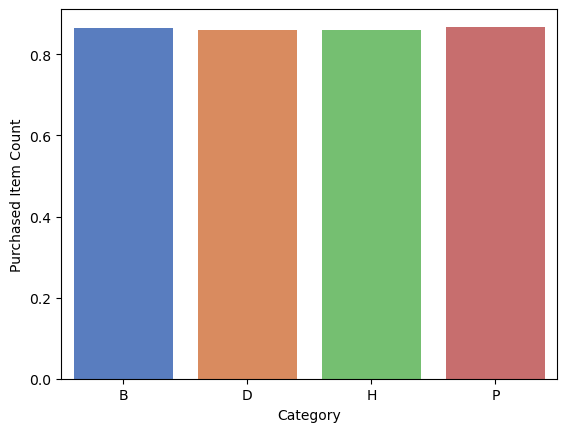

In [118]:
p_cnt_df = o_df.groupby('Category')['Purchased Item Count'].mean().reset_index()
p_cnt_df = p_cnt_df[p_cnt_df['Category'].isin(['P', 'H', 'D', 'B'])]

sns.barplot(x='Category', y='Purchased Item Count', data=p_cnt_df, palette='muted')
plt.show()

#### 🖥️시각화 결과
- 다른 카테고리에 비해 평균 구매 수량이 낮아 낮은 Frequency 점수를 보였을 것으로 예상했던 영가설 1과는 달리,  
  매출액 기준 상위 4개의 카테고리 모두 평균 구매 수량은 대체로 비슷한 수치를 나타냈다.

#### ❌영가설 1은 참이 아님을 확인할 수 있다.

- 또 다른 원인으로 아래와 같은 영가설을 수립할 수 있다.


#### ⏬영가설 2
#### - B 카테고리 제품의 Bronze 등급 매출액 비율이 높은 것은 타 카테고리 제품에 비해 평균 가격이 낮기 때문이다.

- 해당 가설을 검증하기 위해 앞서 주목한 4개의 카테고리에 대해 고객이 지불한 수량별 가격을 구한 뒤 시각화하고자 한다.

In [141]:
price_df = o_df.copy()
price_df.loc[:, 'Unit price'] = price_df['Overall Revenue'] / price_df['Final Quantity'].where(price_df['Final Quantity'] != 0, 1)
price_df

,Item Name,Category,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Refunds,Overall Revenue,Refunded Item Count,Purchased Item Count,TotalScore,Level,Unit price
0,QID,H,46567054.0,3301861.0,5.363560e+13,2019-04-14,1,0.0,89.0,0,1,1.229478,Diamond,89.0
1,MAG,B,24064862.0,3301861.0,6.016930e+13,2018-11-23,1,0.0,79.2,0,1,1.229478,Diamond,79.2
2,OTH,D,61310715.0,3301861.0,6.025800e+13,2019-04-27,1,0.0,89.0,0,1,1.229478,Diamond,89.0
3,INU,D,19814633.0,3301861.0,7.841720e+13,2019-02-10,1,0.0,89.0,0,1,1.229478,Diamond,89.0
4,VXH,P,40522014.0,3301861.0,1.013270e+13,2018-12-09,1,0.0,95.0,0,1,1.229478,Diamond,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69040,EYV,H,63979323.0,9665063.0,6.612840e+13,2019-01-13,1,0.0,62.0,0,1,0.425353,Silver,62.0
69041,WHX,P,78029228.0,7942710.0,8.840060e+13,2019-04-02,1,0.0,95.0,0,1,0.874779,Gold,95.0
69042,WHX,P,66995443.0,9573019.0,5.620920e+13,2019-03-05,1,0.0,95.0,0,1,0.719224,Silver,95.0
69043,KNB,P,35445869.0,1913362.0,1.506840e+13,2019-04-03,1,0.0,85.5,0,1,0.877301,Gold,85.5


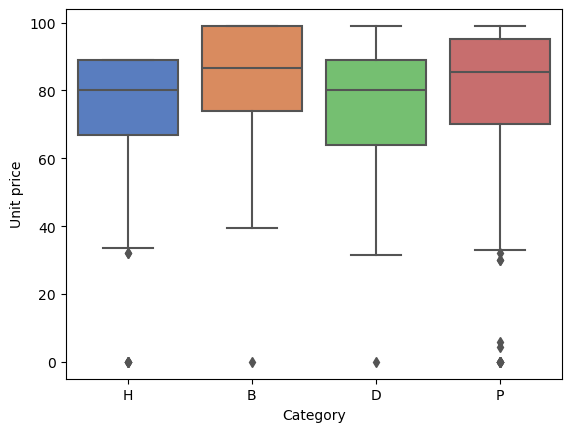

In [147]:
price_df = price_df[price_df['Category'].isin(['P', 'H', 'D', 'B'])]

sns.boxplot(x='Category', y='Unit price', data=price_df, palette='muted')
plt.show()

#### 🖥️시각화 결과
- B 카테고리 제품의 제품 1개 당 평균 가격을 살펴본 결과, 영가설 3과는 반대로 오히려 가장 높은 평균 가격 및 가격 분포를 보였다.
- 따라서 B 카테고리 제품 구매 고객 중 Bronze 등급 고객의 비중이 높은 것은 낮은 평균 가격으로 인한 낮은 Monetary 점수에서 기인한 결과라고 보기 어렵다.

#### ❌영가설 2 또한 참이 아님을 확인할 수 있다.
- 아래와 같은 영가설 3을 수립하였다.

#### ⏬영가설 3
#### - B 카테고리의 제품에 대한 Bronze 등급의 매출액 비중이 높은 이유는 신규 거래의 비중이 적어 구매 고객의 Recency 점수가 낮기 때문이다.

- 해당 가설을 검증하기 위해 B 카테고리 제품 판매 데이터 중 판매 날짜에 주목하고자 한다.

In [94]:
B_date_df = o_df.loc[o_df['Category'] == 'B', ['Date', 'Overall Revenue']]
B_date_df = B_date_df.groupby('Date')['Overall Revenue'].sum()
B_date_df

Date
2018-11-01    1864.42
2018-11-02    1276.94
2018-11-03    1489.20
2018-11-04    6433.49
2018-11-05    2499.00
               ...   
2019-04-10     -99.00
2019-04-11     -69.00
2019-04-12     -62.10
2019-04-16     -69.00
2019-04-27     -58.65
Name: Overall Revenue, Length: 152, dtype: float64

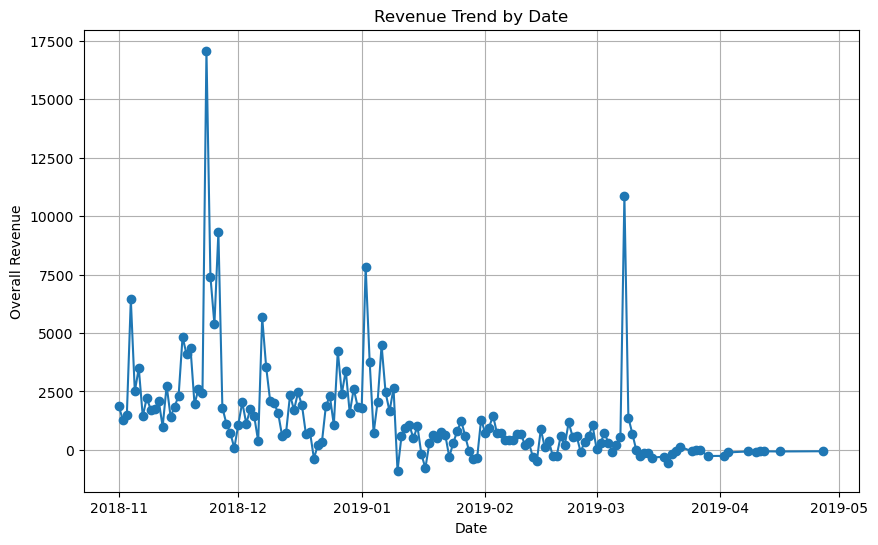

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(B_date_df, marker='o', linestyle='-')
plt.title('Revenue Trend by Date')
plt.xlabel('Date')
plt.ylabel('Overall Revenue')
plt.grid(True)
plt.show()

#### ➡️영가설 3은 참으로 판단할 수 있다.

- 대체로 B 카테고리의 제품을 구매한 데이터는 Recency 점수를 감소시킬 수 있는, 최근보다는 이전의 날짜에 주로 분포하는 것을 확인할 수 있다.
- 하지만 B 카테고리의 제품을 구매한 고객이 다른 카테고리의 제품을 더 많이 구매했을 수 있는 점 등, 복합적인 요인이 영향을 주었을 수 있으므로 해당 영가설(영가설 3)만으로는 Bronze 등급의 매출액 비중이 높은 이유를 완전히 설명하기 어렵다.

### ✏️요약

- 주문 데이터를 기반으로 산정한 RFM 점수를 바탕으로 고객을 Bronze, Silver, Gold, Diamond, VIP의 5가지 등급으로 분류한 후 카테고리별 등급에 따른 구매 수량과 매출액을 시각화하였다.
- 구매 수량 및 매출액 기준 상위 4개 카테고리(P, H, D, B)에 대하여 등급별 매출액 비중을 시각화한 결과, 다른 카테고리와 달리 B 카테고리에서 Bronze 등급의 매출액 비중이 높은 수치를 보여 3가지 영가설을 수립하고 검증하였다.

- 첫 번째 영가설은 B 카테고리의 평균 구매 수량(Frequency)이 낮기 때문이라는 것이었으나, 실제 카테고리별 평균 구매 수량을 시각화한 결과 상위 4개 카테고리의 평균 구매 수량이 모두 유사한 수치를 보여 해당 가설이 참이 아님을 검증하였다.
- 두 번째 영가설은 B 카테고리의 제품당 평균 가격(Monetary)이 낮기 때문이라는 것이었으나, 실제 카테고리별 가격의 분포를 시각화한 결과 오히려 B 카테고리의 가격이 가장 높게 나타나 해당 가설 또한 참이 아님을 검증하였다.

- 마지막 영가설은 B 카테고리의 제품들이 최근보다는 이전의 날짜에 주로 구매가 이루어져 Recency 점수가 낮았기 때문이라는 것이었으며, 실제 날짜별 B 카테고리 제품의 구매 기록을 시각화한 결과 2019년 1월 중순을 기준으로 이전의 매출액이 더 높은 분포를 보여 해당 가설은 참으로 간주할 수 있다.

- 하지만 해당 가설만으로는 Bronze 등급의 높은 매출액 비중을 설명하는 데 한계가 있다고 판단된다.
- 주어진 데이터의 상품명과 카테고리명이 코드 또는 알파벳으로 되어 있어 상품의 상세 정보를 알 수 없으며, 고객과 관련된 데이터의 경우에도 고객의 고유 id에 대한 데이터만 존재하므로 보다 상세한 분석을 수행하기 어려운 데이터라는 점에서 한계가 존재한다.
- 해당 데이터의 카테고리 목록에 대한 상세 정보를 담은 데이터셋이나, 고객 상세 정보를 담은 데이터셋을 추가한다면 보다 정밀한 분석이 가능할 것으로 예상된다.


### 📌마케팅 전략 제안

- Bronze 등급의 경우 가장 높은 매출액 비중을 보인 B 카테고리를 제외한다면 대체로 고른 분포를 보이고 있습니다. 따라서 Bronze 등급의 고객들을 더 높은 등급의 고객, 즉 충성고객으로 전환할 수 있도록 전체 카테고리의 제품을 대상으로 재구매 할인 혜택을 제공하거나, 포인트 제도를 도입하여 누적 포인트에 따라 승급 혜택을 제공함으로써 충성도를 높이는 방향이 효과적일 것으로 예상됩니다.
- 또한 친구나 가족을 추천할 경우 추가적인 프로모션 혜택을 제공함으로써, 신규 고객을 유치함과 동시에 기존 Bronze 등급의 회원들의 이용 빈도를 증가시켜 더 높은 등급의 고객으로 유도할 수 있습니다.
  
- 매출액의 가장 많은 비중을 차지하는 Silver 및 Gold 등급의 경우 업셀링(Upselling) 및 크로스셀링(Cross-selling) 전략이 효과적일 수 있습니다. 예를 들어, Silver나 Gold 등급의 고객들이 구매하고자 하는 제품이나 서비스에 대해 더 높은 가격대의 제품 및 서비스를 추천하는 업셀링 전략이나, 해당 등급의 고객들의 구매 이력이 있는 제품들과 유사한 제품이나 해당 제품을 보조할 수 있는 제품(액세서리 등)을 추천하는 크로스셀링 전략을 통해 매출액을 크게 증대시킬 수 있습니다.

- 매출액을 기반으로 비교적 낮은 비중을 차지하는 Diamond 및 VIP 등급의 경우 해당 등급에 대한 독점적인 온라인/오프라인 이벤트를 제공하는 방법이 효과적일 것으로 예상됩니다. 예를 들어, 신제품 발표 행사의 초청권을 제공하거나 고급 브랜드와의 협업 이벤트 및 무료 배송 혜택을 제공할 수 있습니다.
- 또한 제품 및 서비스 구매 이력이 많은 해당 등급의 고객들을 대상으로 지속적인 피드백 및 소통을 유지함으로써 요구사항을 분석 및 반영하고, 이를 바탕으로 제품을 개선할 수 있음과 동시에 해당 등급 고객들의 충성도를 높임으로써 매출액 비중을 증가시킬 수 있습니다.